In [2]:
import matplotlib.pyplot as pl
import pickle
import numpy as np
import sys
%matplotlib inline
# %matplotlib qt


#X mirror,Old Septum; No Filter
file1=open( '../../data/raw_data/20160818_1441_I.1xII.2xIII.1.pkl' , 'rb')
d1=pickle.load(file1)
file1.close()


#X mirror, New Septum; No Filter
file2=open( '../../data/raw_data/20160818_1514_I.4xII.2xIII.1.pkl' , 'rb')
d2=pickle.load(file2)
file2.close()

#X mirror,Old Septum; 7icm filer
file3=open( '../../data/raw_data/20160818_1445_I.1xII.2xIII.13.pkl' , 'rb')
d3=pickle.load(file3)
file3.close()
#X mirror, New Septum; No Filter
file4=open( '../../data/raw_data/20160818_1519_I.4xII.2xIII.13.pkl' , 'rb')
d4=pickle.load(file4)
file2.close()

svpath = 'C:\\Users\\hazalgoksu\\Documents\\trialpython\\'
md=320

In [3]:
type(d1)
d1.keys()

['wlf0R',
 'wlf0F',
 'oversample',
 'ADC gain',
 'scan time',
 'iterations',
 'scan start struct_time',
 'speed',
 'acceleration',
 'max_d',
 'max_nu',
 'run',
 'delay0F',
 'dx',
 'delay0R',
 'sample freq',
 'sig0R',
 'scan0F',
 'acc time',
 'samples requested',
 'sig0F',
 'scan0R']

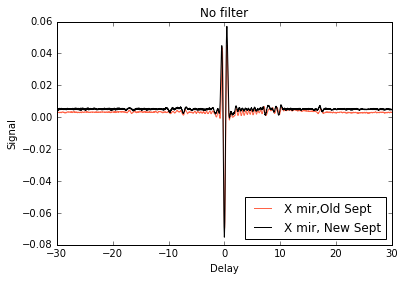

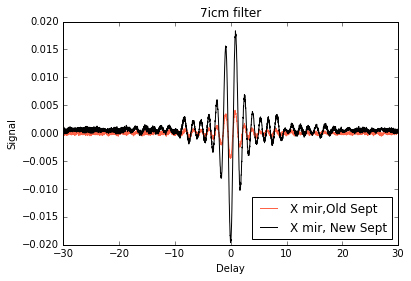

In [3]:
#Comparing with X mirror, New Septum; No Filter
X1=d1['delay0F']
Y1=d1['sig0F']

X2=d2['delay0F']
Y2=d2['sig0F']

X3=d3['delay0F']
Y3=d3['sig0F']

X4=d4['delay0F']
Y4=d4['sig0F']

Y1=Y1- np.mean(Y1[0:100])
Y2=Y2- np.mean(Y2[0:100])
Y3=Y3- np.mean(Y3[0:100])
Y4=Y4- np.mean(Y4[0:100])

Y1scale = Y1/(np.max(np.abs(Y1)))*(np.max(np.abs(Y2)))
Y3scale = Y3/(np.max(np.abs(Y3)))*(np.max(np.abs(Y4)))

pl.plot(X1,Y1,label='X mir,Old Sept', color='tomato')
pl.plot(X2,Y2,label='X mir, New Sept', color='k')
pl.xlim(-30,30)
pl.title('No filter')
pl.ylabel('Signal')
pl.xlabel('Delay')
pl.legend(loc='lower right')
pl.savefig(svpath+'XOld.png',format='png', bbox_inches='tight', dpi=md)
pl.show()

pl.plot(X3,Y3,label='X mir,Old Sept', color='tomato')
pl.plot(X4,Y4,label='X mir, New Sept', color='k')
pl.xlim(-30,30)
pl.title('7icm filter')
pl.ylabel('Signal')
pl.xlabel('Delay')
pl.legend(loc='lower right')
pl.savefig(svpath+'XOld7icm.png',format='png', bbox_inches='tight', dpi=md)
pl.show()

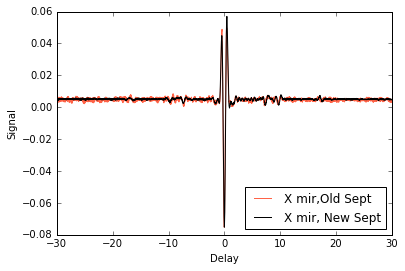

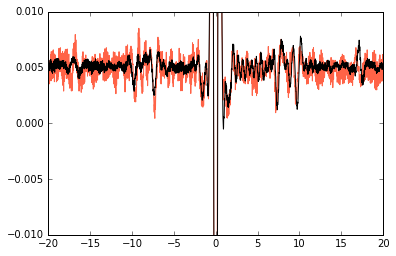

In [84]:
pl.plot(X1,Y1scale,label='X mir,Old Sept', color='tomato')
pl.plot(X2,Y2,label='X mir, New Sept', color='k')
pl.xlim(-30,30)
#pl.ylim(-0.30,0.2)
pl.ylabel('Signal')
pl.xlabel('Delay')
pl.legend(loc='lower right')
pl.savefig(svpath+'XOld_scaled.png',format='png', bbox_inches='tight', dpi=md)
pl.show()

#Zoom
pl.plot(X1,Y1scale, color='tomato')
pl.plot(X2,Y2, color='k')
pl.xlim(-20,20)
pl.ylim(-0.01,0.01)
pl.savefig(svpath+'XOld_scaled_zoom.png',format='png', bbox_inches='tight', dpi=md)
pl.show()

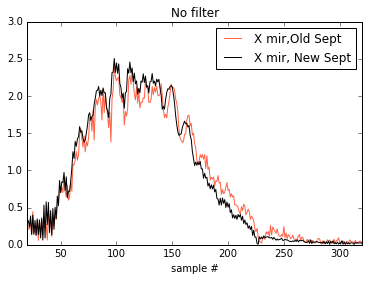

In [85]:
pl.plot(np.abs(np.fft.fft(Y1scale)),label='X mir,Old Sept', color='tomato')
pl.plot(np.abs(np.fft.fft(Y2)),label='X mir, New Sept', color='k')
pl.xlim(20, 320)
pl.ylim(0,3)
pl.title('No filter')
pl.legend()
pl.xlabel('sample #')
pl.savefig(svpath+'XOld_scaledFFT.png',format='png', bbox_inches='tight', dpi=md)
pl.show()

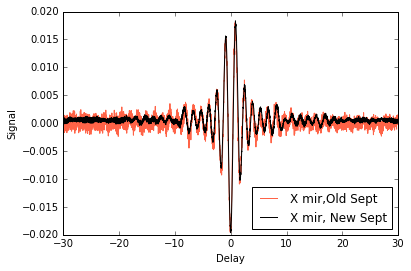

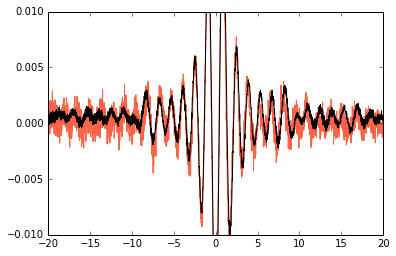

In [86]:
pl.plot(X3,Y3scale,label='X mir,Old Sept', color='tomato')
pl.plot(X4,Y4,label='X mir, New Sept', color='k')
pl.xlim(-30,30)
#pl.ylim(-0.30,0.2)
pl.ylabel('Signal')
pl.xlabel('Delay')
pl.legend(loc='lower right')
pl.savefig(svpath+'XOld_scaled7icm.png',format='png', bbox_inches='tight', dpi=md)
pl.show()

#Zoom
pl.plot(X3,Y3scale, color='tomato')
pl.plot(X4,Y4, color='k')
pl.xlim(-20,20)
pl.ylim(-0.01,0.01)
pl.savefig(svpath+'XOld_scaled_zoom7icm.png',format='png', bbox_inches='tight', dpi=md)
pl.show()

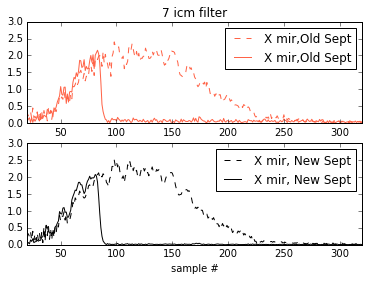

In [87]:
pl.subplot(2,1,1)
pl.plot(np.abs(np.fft.fft(Y1scale)),ls='--',label='X mir,Old Sept', color='tomato')
pl.plot(np.abs(np.fft.fft(Y3scale)),label='X mir,Old Sept', color='tomato')
pl.xlim(20, 320)
pl.ylim(0,3)
pl.title('7 icm filter')
pl.legend()
pl.xlabel('sample #')
pl.subplot(2,1,2)
pl.plot(np.abs(np.fft.fft(Y2)), ls= '--',label='X mir, New Sept', color='k')
pl.plot(np.abs(np.fft.fft(Y4)),label='X mir, New Sept', color='k')
pl.xlim(20, 320)
pl.ylim(0,3)

pl.legend()
pl.xlabel('sample #')
pl.savefig(svpath+'XOld_scaledFFT7icm.png',format='png', bbox_inches='tight', dpi=md)
pl.show()

In [88]:
sys.exit()

SystemExit: 

To exit: use 'exit', 'quit', or Ctrl-D.


In [ ]:

import os


Y = raw_input('Signal(0F or 0R): ')

pl.ion()

fig = pl.figure(1)
ax2 = pl.subplot2grid((2,1), (0,0), colspan=1,)
pl.figure()
pl.plot (d['delay'+ Y], d['sig'+Y] )
pl.show()
ax2.set_xlabel ("Delay0F")
ax2.set_ylabel ("Sig0F")


In [1]:
i = 11
Nsize = 2**i
dt=(1/(d['sample freq']))
t=dt*np.arange(Nsize)
v=(d['speed'])
x = v*t
dx = dt*v
total_t = (d['scan time'])

total_s = (d['samples requested'])
startpt = ((total_s - Nsize)/2) #Not sure how to do this
endpt = startpt + Nsize

F = (d['sig'+ Y])
A = F[startpt:endpt]
S = np.fft.rfft(A)

S = S[:-1]
u = np.abs(S)
dNu = 1/(Nsize*dx)
Nu = dNu*np.arange(Nsize/2)
print Nsize
print len(A)
print len(Nu)
print len(S)
pl.figure()
pl.plot (300*Nu,np.abs(S)) 
pl.xlabel ("frequency, GHz")
pl.ylabel ('Power, arb')
pl.show()


SyntaxError: Missing parentheses in call to 'print' (<ipython-input-1-e532b7f8f557>, line 23)